In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [3]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

### Categorical plots

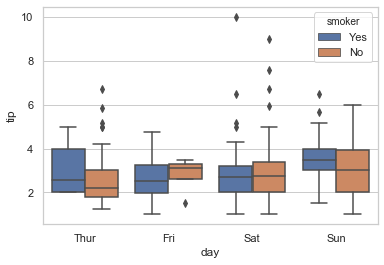

In [4]:
sns.boxplot(x="day",y="tip", data = tips, hue='smoker')

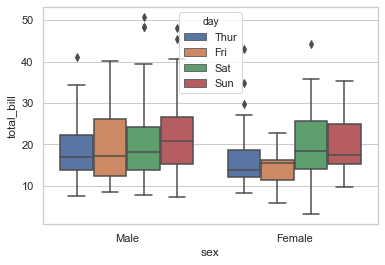

In [5]:
sns.boxplot(x="sex",y="total_bill",hue="day", data = tips)

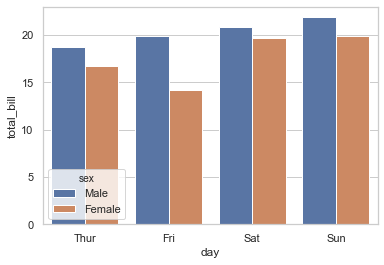

In [6]:
sns.barplot(x="day",y="total_bill", hue="sex", data = tips, ci=False)

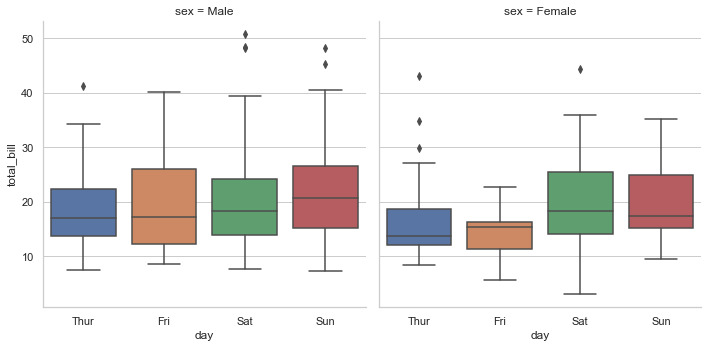

In [7]:
sns.catplot(x="day",y="total_bill",data=tips,col="sex", kind='box')

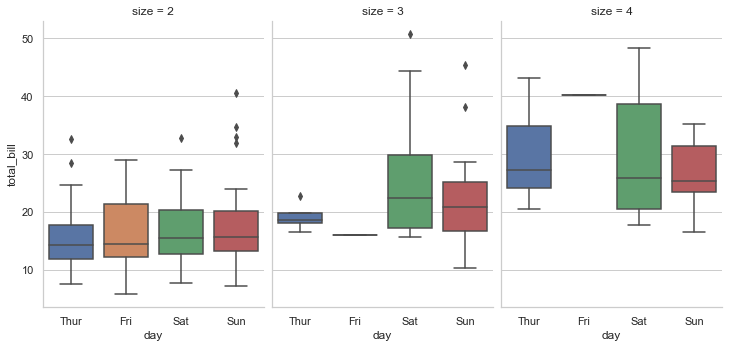

In [8]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", kind='box')
plt.gcf().set_size_inches(10,5)  # Change current figure size 

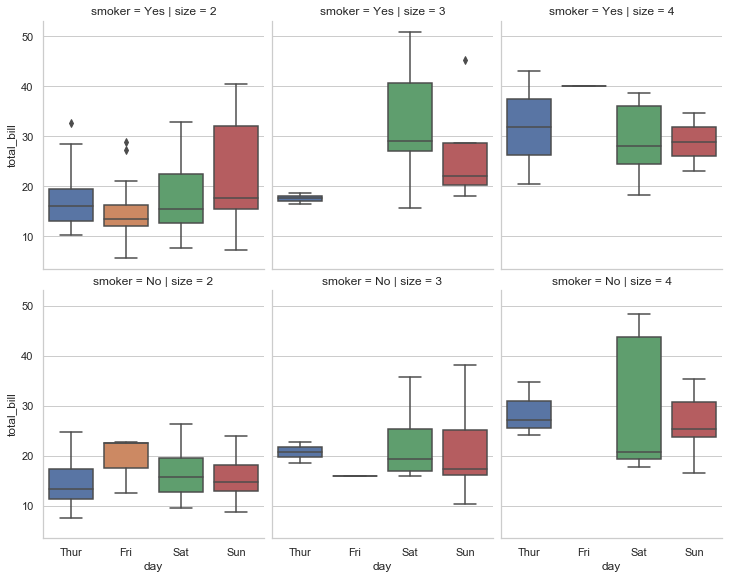

In [9]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", row="smoker", kind='box')
plt.gcf().set_size_inches(10,8)  # Change current figure size 

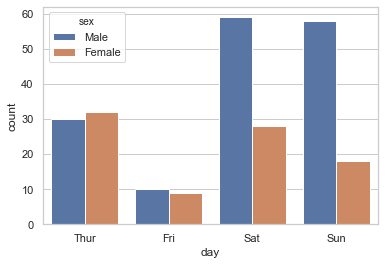

In [10]:
sns.countplot(x="day",hue ="sex", data=tips)

In [11]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [12]:
flights.groupby('month')['passengers'].sum()

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

In [14]:
flights['month'].value_counts().isin(['January','February','March'])

December     False
November     False
October      False
September    False
August       False
July         False
June         False
May          False
April        False
March        False
February     False
January      False
Name: month, dtype: bool

March        12
February     12
January      12
December      0
November      0
October       0
September     0
August        0
July          0
June          0
May           0
April         0
Name: month, dtype: int64

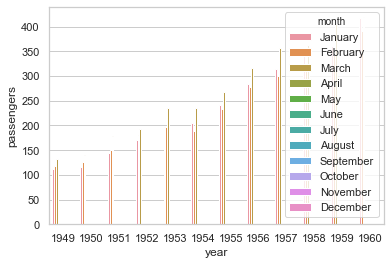

In [13]:
sns.barplot(x="year",y="passengers",hue="month",data=q1,ci=False,estimator=np.sum)
q1.month.value_counts().isin('')

In [14]:
q1.dtypes

year             int64
month         category
passengers       int64
dtype: object

### Relational plots

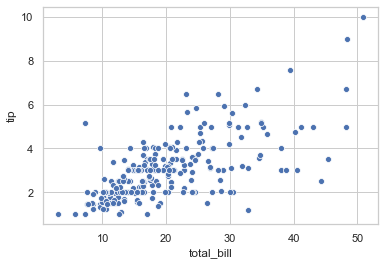

In [15]:
sns.scatterplot(x="total_bill",y="tip", data=tips)

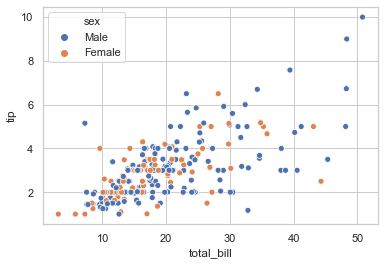

In [16]:
sns.scatterplot(x="total_bill",y="tip",hue="sex", data=tips)

In [17]:
fs = flights.groupby('month',as_index=False)['passengers'].sum()

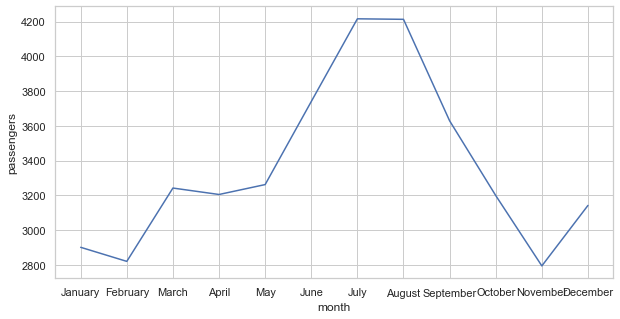

In [18]:
sns.lineplot(x=fs.month, y = fs.passengers)
plt.gcf().set_size_inches(10,5)

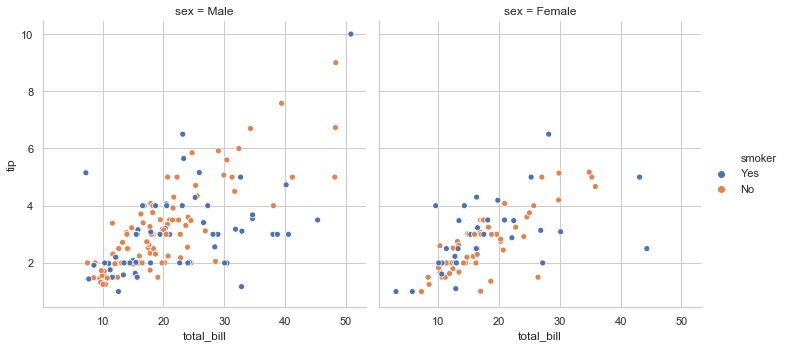

In [19]:
sns.relplot(x="total_bill",y="tip",col="sex", hue="smoker",data=tips)

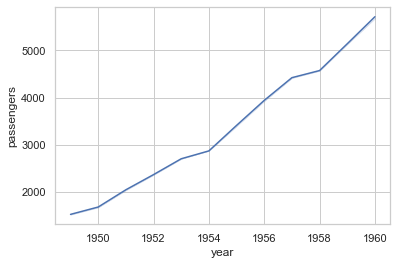

In [20]:
sns.lineplot(x="year",y="passengers",data=flights, estimator=np.sum, ci=False)

## Distribution plots

### pairplot

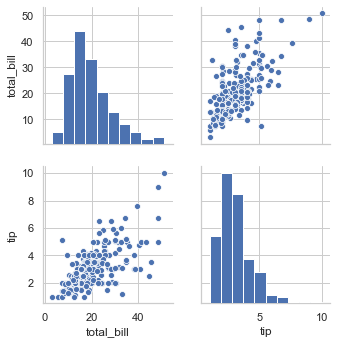

In [21]:
sns.pairplot(tips,vars=['total_bill','tip'], diag_kind='hist')
#plt.gcf().set_size_inches(8,8)

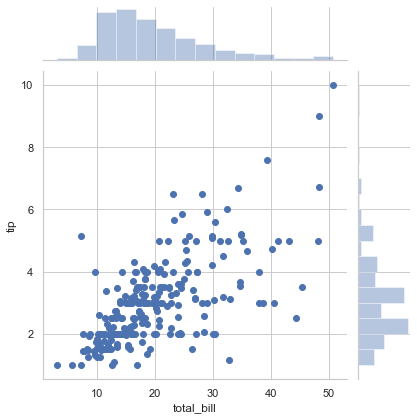

In [22]:
sns.jointplot(x='total_bill', y = 'tip', data = tips)

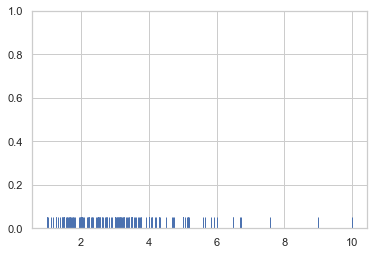

In [23]:
sns.rugplot(tips['tip'])

### Regression Plot

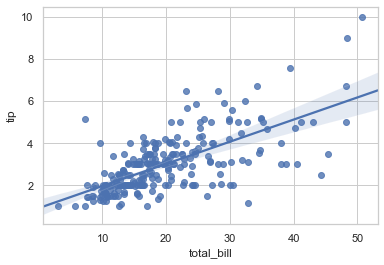

In [24]:
sns.regplot(x="total_bill",y='tip', data=tips)

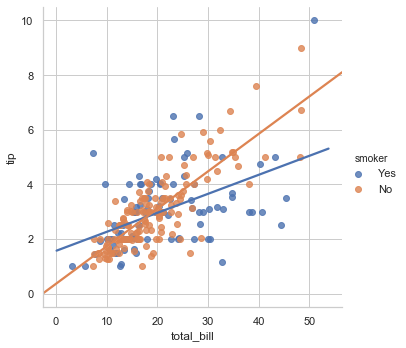

In [25]:
sns.lmplot(x="total_bill",y='tip',hue="smoker", data=tips,ci=False)

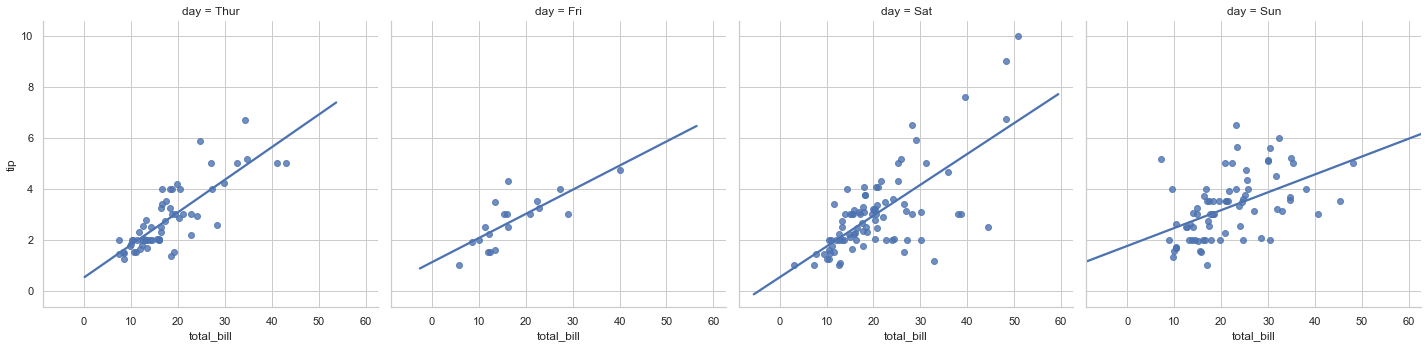

In [26]:
sns.lmplot(x="total_bill",y='tip',col='day', data=tips,ci=False)

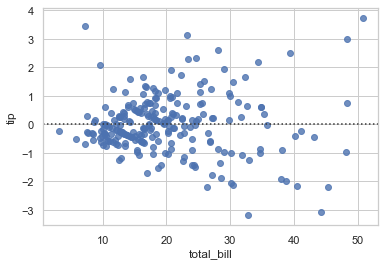

In [27]:
sns.residplot(x="total_bill",y='tip', data=tips)

### Matrix plots

In [28]:
day_tips = tips.groupby('day', as_index=False)['tip','total_bill'].sum()

In [29]:
day_tips

,day,tip,total_bill
0,Thur,171.83,1096.33
1,Fri,51.96,325.88
2,Sat,260.40,1778.40
3,Sun,247.39,1627.16


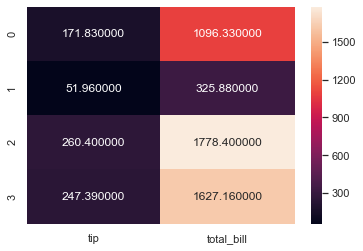

In [30]:
sns.heatmap(day_tips[['tip','total_bill']],annot=True,fmt="f")

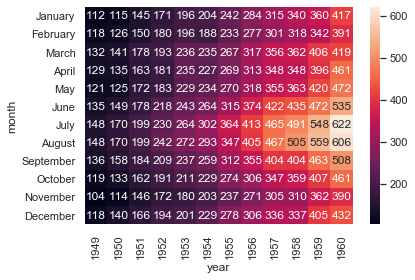

In [31]:
fl_summary = flights.pivot('month','year','passengers')
ax = sns.heatmap(fl_summary, annot=True, fmt="d")

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


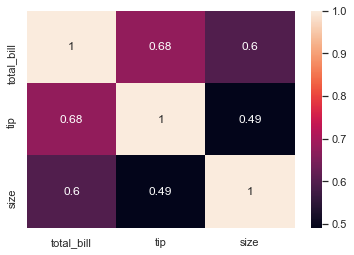

In [32]:
cm = tips.corr()
print(cm)
sns.heatmap(cm,annot=True)